# 1. Import Library

In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Write Function

In [2]:
def MR_find_W(X, Y):
    Xb = MR_create_Xb(X)
    front = inv(np.dot(Xb.T, Xb))
    back = np.dot(Xb.T, Y)
    W = np.dot(front, back)
    return W

In [3]:
def MR_create_Xb(X):
    N = X.shape[0]
    ones = np.ones([N, 1])
    Xb = np.hstack([ones, X])
    return Xb

In [4]:
def MR_find_Yhat(X, W):
    Xb = MR_create_Xb(X)
    Yhat = np.dot(Xb, W)
    return Yhat

In [5]:
def find_error(Y, Yhat, TypeOfError):
    if TypeOfError == 'SSE':
        error = find_SSE(Y, Yhat)
    elif TypeOfError == 'MSE':
        error = find_MSE(Y, Yhat)
    elif TypeOfError == 'MAE':
        error = find_MAE(Y, Yhat)
    elif TypeOfError == 'MAPE':
        error = find_MAPE(Y, Yhat)
    return error

In [6]:
def find_SSE(Y, Yhat):
    SSE = ((Y - Yhat)**2).sum()
    return SSE

In [7]:
def find_MSE(Y, Yhat):
    N = Y.shape[0]
    SSE = ((Y - Yhat)**2).sum()
    MSE = SSE/N
    return MSE

In [8]:
def find_MAE(Y, Yhat):
    N = Y.shape[0]
    MAE = (np.abs(Y - Yhat)).sum()/N
    return MAE

In [9]:
def find_MAPE(Y, Yhat):
    N = Y.shape[0]
    MAPE = np.abs((Y - Yhat)/Y).sum()*100/N
    return MAPE

# 3. Read Data & Prepare Data

In [30]:
Data = pd.read_csv('kc_house_data.csv', usecols = ["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront"
] )

In [32]:
Data  # use colums N -> AC

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0,221900.0,3,1.00,1180,5650,1.0,0
1,538000.0,3,2.25,2570,7242,2.0,0
2,180000.0,2,1.00,770,10000,1.0,0
3,604000.0,4,3.00,1960,5000,1.0,0
4,510000.0,3,2.00,1680,8080,1.0,0
5,1225000.0,4,4.50,5420,101930,1.0,0
6,257500.0,3,2.25,1715,6819,2.0,0
7,291850.0,3,1.50,1060,9711,1.0,0
8,229500.0,3,1.00,1780,7470,1.0,0
9,323000.0,3,2.50,1890,6560,2.0,0


In [33]:
DataMatrix = Data.values

In [34]:
DataMatrix.shape

(21613, 7)

In [53]:
# ทำให้อยู่ในแบบ Matrix
X = DataMatrix[:, 1:6] # coumlum 1 -> 16

In [54]:
Y = DataMatrix[:, 0:1] # coumlum 0 

In [55]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, 5.650e+03, 1.000e+00],
       [3.000e+00, 2.250e+00, 2.570e+03, 7.242e+03, 2.000e+00],
       [2.000e+00, 1.000e+00, 7.700e+02, 1.000e+04, 1.000e+00],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, 1.350e+03, 2.000e+00],
       [3.000e+00, 2.500e+00, 1.600e+03, 2.388e+03, 2.000e+00],
       [2.000e+00, 7.500e-01, 1.020e+03, 1.076e+03, 2.000e+00]])

In [56]:
Y #Target High 0

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [60]:
#จากปัจจุบันถึง จำนวนวันทั้งหมดลบ  150 วัน
X_Train = X[:-150, :]
Y_Train = Y[:-150, :]

# % percent
#X_Train = X[:int(N*0.7), :]
#Y_Train = Y[:int(N*0.7), :]
#X_Train
Y_Train

array([[ 221900.],
       [ 538000.],
       [ 180000.],
       ...,
       [1020000.],
       [ 518000.],
       [ 535000.]])

In [61]:
#จากปัจจุบันย้อนไป 150 วัน
X_Test = X[-150:, :]
Y_Test = Y[-150:, :]
Y_Test

array([[ 337500.],
       [ 380000.],
       [ 875000.],
       [ 385000.],
       [1987500.],
       [ 649500.],
       [1050000.],
       [ 249000.],
       [ 525000.],
       [ 402000.],
       [1750000.],
       [ 359800.],
       [ 330000.],
       [ 433000.],
       [1010800.],
       [ 599832.],
       [ 312891.],
       [ 449000.],
       [ 495000.],
       [ 819995.],
       [ 407500.],
       [ 850000.],
       [1720000.],
       [1459000.],
       [ 579000.],
       [ 890776.],
       [ 352500.],
       [ 529000.],
       [ 484000.],
       [ 400000.],
       [ 649950.],
       [ 915000.],
       [ 534950.],
       [ 776000.],
       [ 370000.],
       [ 610000.],
       [ 850000.],
       [ 443000.],
       [1150000.],
       [ 453000.],
       [ 735000.],
       [ 810000.],
       [1555000.],
       [2238890.],
       [ 377500.],
       [ 482000.],
       [ 600000.],
       [ 420000.],
       [ 480000.],
       [ 406000.],
       [ 505000.],
       [1865000.],
       [ 942

# 4. Create Model

In [62]:
W = MR_find_W(X_Train, Y_Train)

In [63]:
W

array([[ 8.14935367e+04],
       [-5.91163565e+04],
       [ 5.93506750e+03],
       [ 3.14089625e+02],
       [-3.79950703e-01],
       [-1.62998461e+03]])

In [64]:
Yhat_Train = MR_find_Yhat(X_Train, W)

In [65]:
error_Train = find_error(Y_Train, Yhat_Train, 'MAPE')

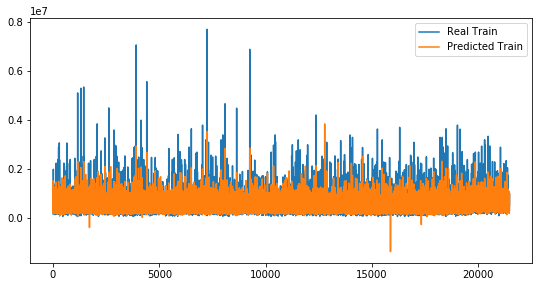

In [66]:
fig = plt.figure(figsize = (9, 4.5))
plt.plot(Y_Train, label = 'Real Train') #ค่าจริง
plt.plot(Yhat_Train, label = 'Predicted Train')
plt.legend()

In [67]:
error_Train

35.0871153730522

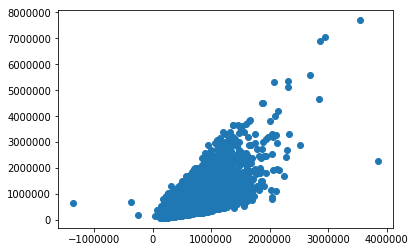

In [68]:
plt.scatter(Yhat_Train, Y_Train)

# 5. Make Prediction

In [69]:
Yhat_Test = MR_find_Yhat(X_Test, W)

In [70]:
error_Test = find_error(Y_Test, Yhat_Test, 'MAPE')

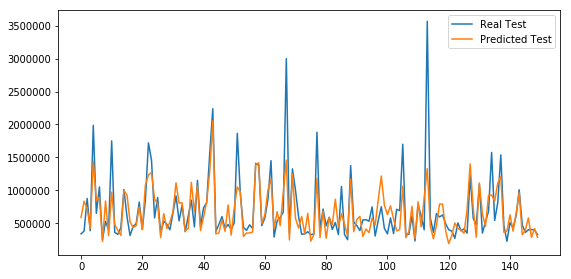

In [71]:
fig = plt.figure(figsize = (9, 4.5))
plt.plot(Y_Test, label = 'Real Test')
plt.plot(Yhat_Test, label = 'Predicted Test')
plt.legend()

In [72]:
error_Test

30.092255764455906

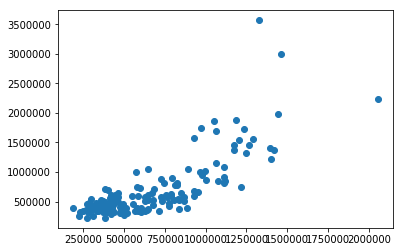

In [73]:
plt.scatter(Yhat_Test, Y_Test)

# 6. Zoom Result

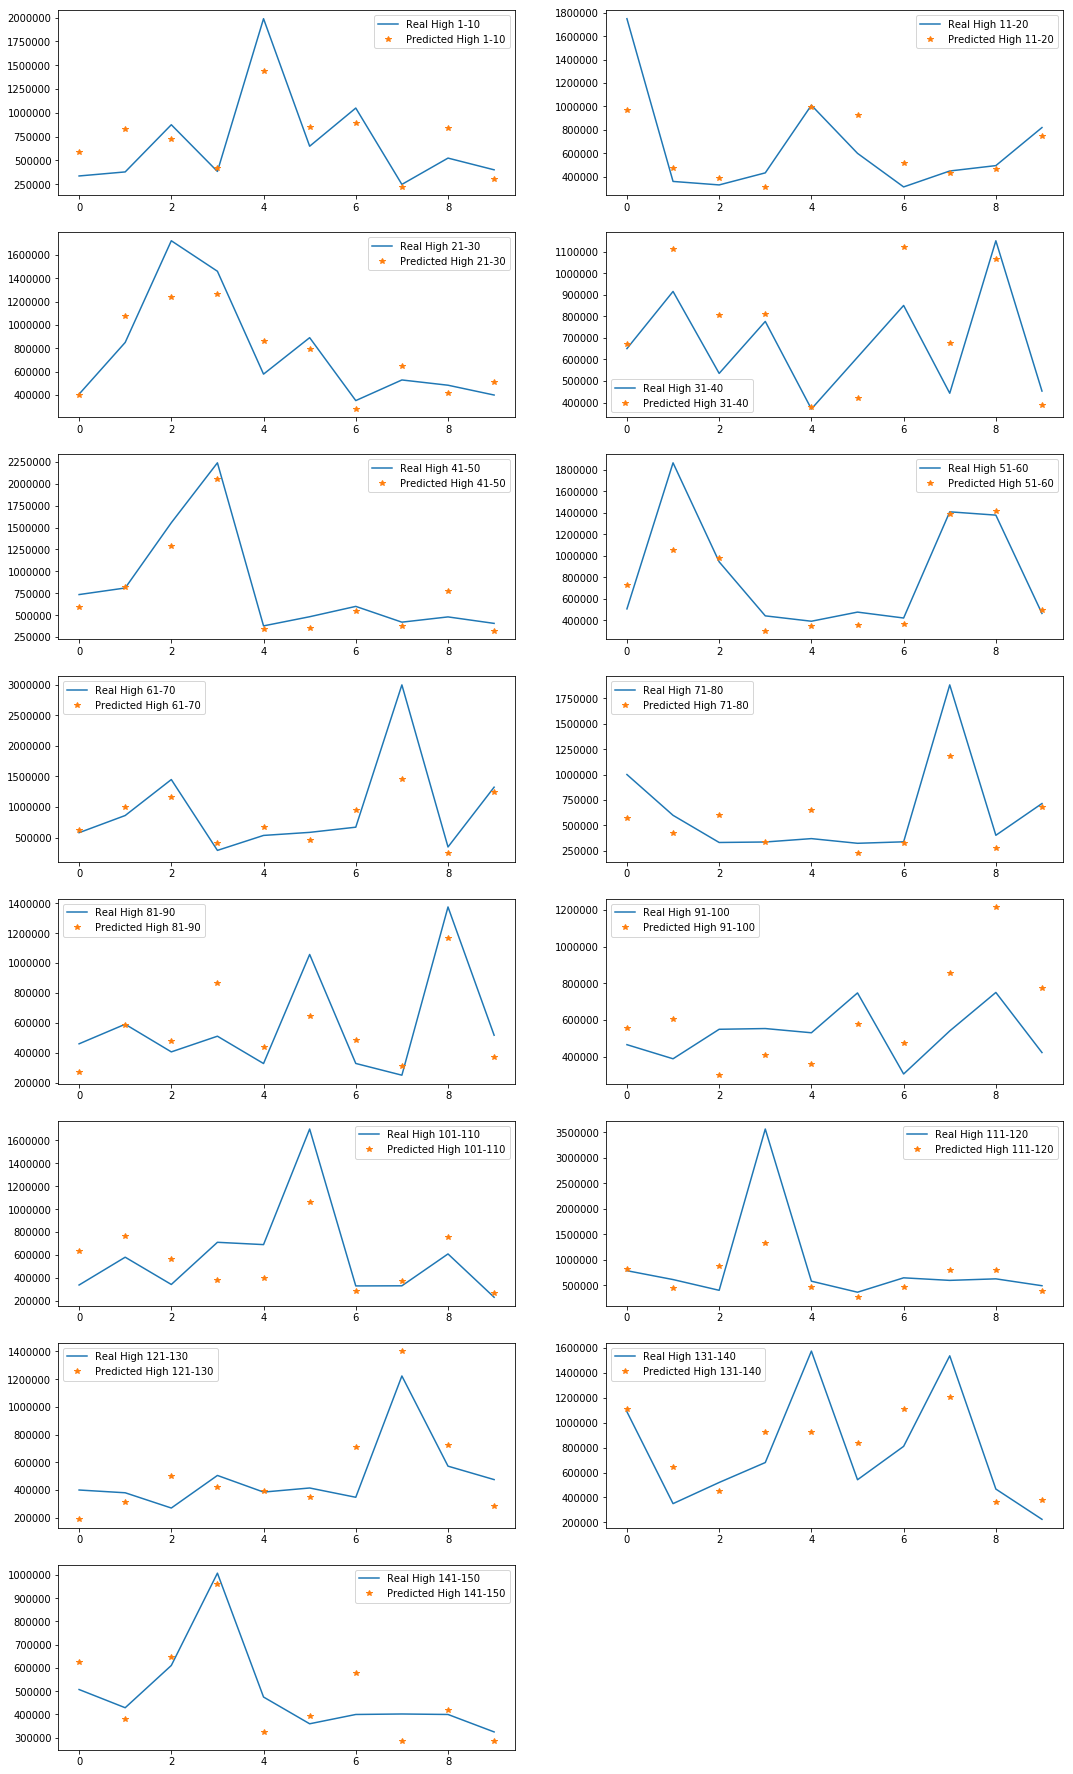

In [74]:
fig = plt.figure(figsize=(18, 32))

for i in range(15):
    plt.subplot(8, 2, i + 1)
    plt.plot(Y_Test[10*i: 10*i + 10], label = 'Real High ' + str(i*10 + 1) + '-'  + str(i*10 + 10))
    plt.plot(Yhat_Test[10*i: 10*i + 10], '*', label = 'Predicted High ' + str(i*10 + 1) + '-'  + str(i*10 + 10))
    plt.legend()